https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets

In [ ]:
# Read dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fordinand45/Vaksin/master/vaccination_all_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
# Cek baris dan kolom
df.shape

(228207, 16)

In [ ]:
df.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [ ]:
# cek tanggal min dan max
df.date.min(), df.date.max()

('2020-12-12 11:55:28', '2021-11-23 20:58:08')

In [ ]:
# cek negara yang paling dominan
df['user_location'].value_counts()

Bengaluru, India                  19651
India                              8293
New Delhi, India                   3086
Toronto, Canada  and Worldwide     2653
United States                      2042
                                  ...  
 12 Tuglaq lane, INDIA🇮🇳              1
Nanded                                1
Gurgaon, Chandigarh, Gurgaon          1
Neu-Delhi, Republik Indien            1
Southern  Africa                      1
Name: user_location, Length: 25458, dtype: int64

In [ ]:
# Cek missing value
df.isna().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [ ]:
col = ['id',	'user_name',	'user_location',	'user_description',	'user_created',	'user_followers',	'user_friends',	'user_favourites',	'user_verified',	'hashtags',	'source',	'retweets',	'favorites',	'is_retweet']

df = df.drop(col, axis=1)
df.head()

,date,text
0,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...
1,2020-12-13 16:27:13,While the world has been on the wrong side of ...
2,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're..."
4,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...


**Labeling Otomatis**

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.dtypes

date    datetime64[ns]
text            object
dtype: object

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = df.text.apply(ps)
sentiment_scores.head()

0    {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...
1    {'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...
2    {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: text, dtype: object

In [ ]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.787,0.213,0.4019
1,0.125,0.766,0.109,-0.1027
2,0.000,0.875,0.125,0.2500
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000


In [ ]:
labelize = lambda x : 0 if x==0 else(1 if x>0 else -1)
sentiment_df['klasifikasi'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,klasifikasi
0,0.000,0.787,0.213,0.4019,1
1,0.125,0.766,0.109,-0.1027,-1
2,0.000,0.875,0.125,0.2500,1
3,0.000,1.000,0.000,0.0000,0
4,0.000,1.000,0.000,0.0000,0


In [ ]:
data = df.join(sentiment_df.klasifikasi)
data.head()

,date,text,klasifikasi
0,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,1
1,2020-12-13 16:27:13,While the world has been on the wrong side of ...,-1
2,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,1
3,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",0
4,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,0


In [ ]:
data['klasifikasi'].value_counts()

 0    111153
 1     79913
-1     37141
Name: klasifikasi, dtype: int64

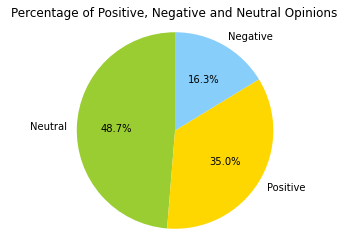

In [ ]:
import matplotlib.pyplot as plt

labels = ['Neutral', 'Positive', 'Negative']
quantity = [111153, 79913, 37141]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.title('Percentage of Positive, Negative and Neutral Opinions')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

**Text Preprocessing**

**Tokenization**

In [ ]:
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenization(text):
    text = word_tokenize(text)
    return text

data['tokenization'] = data['text'].apply(lambda x: tokenization(x))
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,date,text,klasifikasi,tokenization
0,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,1,"[Same, folks, said, daikon, paste, could, trea..."
1,2020-12-13 16:27:13,While the world has been on the wrong side of ...,-1,"[While, the, world, has, been, on, the, wrong,..."
2,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,1,"[#, coronavirus, #, SputnikV, #, AstraZeneca, ..."
3,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",0,"[Facts, are, immutable, ,, Senator, ,, even, w..."
4,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,0,"[Explain, to, me, again, why, we, need, a, vac..."


In [ ]:
print(data.text[0])
print(data.tokenization[0])

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
['Same', 'folks', 'said', 'daikon', 'paste', 'could', 'treat', 'a', 'cytokine', 'storm', '#', 'PfizerBioNTech', 'https', ':', '//t.co/xeHhIMg1kF']


**Normalization**

In [ ]:
def normalization(text):
    text = re.sub(r'[\#\@\!]\w+', '', text) #removing # and @
    text = re.sub('[\d+]','',text) #removing numbers
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) #removing urls 
    text = re.sub(r'[\.\,\;\!\?\*\$\"\'\:]', '', text) #removing some non-sense characters
    text = text.lower()
    return text

data['normalization'] = data['text'].transform(normalization).apply(lambda x: tokenization(x))
data.head()

,date,text,klasifikasi,tokenization,normalization
0,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,1,"[Same, folks, said, daikon, paste, could, trea...","[same, folks, said, daikon, paste, could, trea..."
1,2020-12-13 16:27:13,While the world has been on the wrong side of ...,-1,"[While, the, world, has, been, on, the, wrong,...","[while, the, world, has, been, on, the, wrong,..."
2,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,1,"[#, coronavirus, #, SputnikV, #, AstraZeneca, ...","[russian, vaccine, is, created, to, last, -, y..."
3,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",0,"[Facts, are, immutable, ,, Senator, ,, even, w...","[facts, are, immutable, senator, even, when, y..."
4,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,0,"[Explain, to, me, again, why, we, need, a, vac...","[explain, to, me, again, why, we, need, a, vac..."


In [ ]:
print(data.text[0])
print(data.normalization[0])

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
['same', 'folks', 'said', 'daikon', 'paste', 'could', 'treat', 'a', 'cytokine', 'storm']


In [ ]:
try:
    import emot
except:
    !pip install emot
    import emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 21 kB/s 


**Menghapus Emoji**

In [ ]:
from emot.emo_unicode import UNICODE_EMOJI
emojis = list(UNICODE_EMOJI.keys())

def emoji(text):
  text = ' '.join([word for word in text if word not in emojis]) #removing emojis
  return text

data['menghapus_emoji'] = data['normalization'].transform(emoji).apply(lambda text : tokenization(text))
data.head()

,date,text,klasifikasi,tokenization,normalization,menghapus_emoji
0,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,1,"[Same, folks, said, daikon, paste, could, trea...","[same, folks, said, daikon, paste, could, trea...","[same, folks, said, daikon, paste, could, trea..."
1,2020-12-13 16:27:13,While the world has been on the wrong side of ...,-1,"[While, the, world, has, been, on, the, wrong,...","[while, the, world, has, been, on, the, wrong,...","[while, the, world, has, been, on, the, wrong,..."
2,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,1,"[#, coronavirus, #, SputnikV, #, AstraZeneca, ...","[russian, vaccine, is, created, to, last, -, y...","[russian, vaccine, is, created, to, last, -, y..."
3,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",0,"[Facts, are, immutable, ,, Senator, ,, even, w...","[facts, are, immutable, senator, even, when, y...","[facts, are, immutable, senator, even, when, y..."
4,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,0,"[Explain, to, me, again, why, we, need, a, vac...","[explain, to, me, again, why, we, need, a, vac...","[explain, to, me, again, why, we, need, a, vac..."


In [ ]:
print(data.text[55])
print(data.menghapus_emoji[55])

Concerned about the side effects of the #PfizerBioNTech #COVID19 vaccine?  Check out my recap 👇🏼 https://t.co/P6yfRwS3Fq
['concerned', 'about', 'the', 'side', 'effects', 'of', 'the', 'vaccine', 'check', 'out', 'my', 'recap']


In [ ]:
from nltk.corpus import stopwords
from string import punctuation
import string
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Stopwords**

In [ ]:
# function to remove stopwords
def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet if word not in stop)
  return clean_tweet

data['stopwords'] = data['menghapus_emoji'].transform(stopWords).apply(lambda x: tokenization(x))
data.head()

,date,text,klasifikasi,tokenization,normalization,menghapus_emoji,stopwords
0,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,1,"[Same, folks, said, daikon, paste, could, trea...","[same, folks, said, daikon, paste, could, trea...","[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt..."
1,2020-12-13 16:27:13,While the world has been on the wrong side of ...,-1,"[While, the, world, has, been, on, the, wrong,...","[while, the, world, has, been, on, the, wrong,...","[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,..."
2,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,1,"[#, coronavirus, #, SputnikV, #, AstraZeneca, ...","[russian, vaccine, is, created, to, last, -, y...","[russian, vaccine, is, created, to, last, -, y...","[russian, vaccine, created, last, years…]"
3,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",0,"[Facts, are, immutable, ,, Senator, ,, even, w...","[facts, are, immutable, senator, even, when, y...","[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, youre, ethic..."
4,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,0,"[Explain, to, me, again, why, we, need, a, vac...","[explain, to, me, again, why, we, need, a, vac...","[explain, to, me, again, why, we, need, a, vac...","[explain, need, vaccine, …]"


In [ ]:
print(data.text[0])
print(data.stopwords[0])

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
['folks', 'said', 'daikon', 'paste', 'could', 'treat', 'cytokine', 'storm']


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Lemmatization**

In [ ]:
lemma = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [lemma.lemmatize(word) for word in text]
    return text

data['lemmatization'] = data['stopwords'].transform(lemmatizer).apply(lambda x: lemmatizer(x))
data.head()

,date,text,klasifikasi,tokenization,normalization,menghapus_emoji,stopwords,lemmatization
0,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,1,"[Same, folks, said, daikon, paste, could, trea...","[same, folks, said, daikon, paste, could, trea...","[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt...","[folk, said, daikon, paste, could, treat, cyto..."
1,2020-12-13 16:27:13,While the world has been on the wrong side of ...,-1,"[While, the, world, has, been, on, the, wrong,...","[while, the, world, has, been, on, the, wrong,...","[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,...","[world, wrong, side, history, year, hopefully,..."
2,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,1,"[#, coronavirus, #, SputnikV, #, AstraZeneca, ...","[russian, vaccine, is, created, to, last, -, y...","[russian, vaccine, is, created, to, last, -, y...","[russian, vaccine, created, last, years…]","[russian, vaccine, created, last, years…]"
3,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",0,"[Facts, are, immutable, ,, Senator, ,, even, w...","[facts, are, immutable, senator, even, when, y...","[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, youre, ethic...","[fact, immutable, senator, even, youre, ethica..."
4,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,0,"[Explain, to, me, again, why, we, need, a, vac...","[explain, to, me, again, why, we, need, a, vac...","[explain, to, me, again, why, we, need, a, vac...","[explain, need, vaccine, …]","[explain, need, vaccine, …]"


In [ ]:
print(data.text[0])
print(data.lemmatization[0])

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
['folk', 'said', 'daikon', 'paste', 'could', 'treat', 'cytokine', 'storm']


**TF-IDF**

In [ ]:
lemma = data['lemmatization'].astype(str)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_input_tfidf = tfidf_vectorizer.fit_transform(lemma)

In [ ]:
print(tfidf_vectorizer.vocabulary_)

{'folk': 16377, 'said': 37579, 'daikon': 10741, 'paste': 31911, 'could': 9892, 'treat': 44245, 'cytokine': 10672, 'storm': 41301, 'world': 48285, 'wrong': 48415, 'side': 39367, 'history': 19667, 'year': 48663, 'hopefully': 19907, 'biggest': 5058, 'vaccination': 45958, 'effort': 13763, 'weve': 47702, 'ev': 14754, 'russian': 37389, 'vaccine': 45996, 'created': 10237, 'last': 24477, 'years': 48668, 'fact': 15367, 'immutable': 20780, 'senator': 38525, 'even': 14779, 'youre': 48861, 'ethically': 14675, 'sturdy': 41511, 'enough': 14290, 'acknowledge': 489, 'born': 5834, 'explain': 15158, 'need': 29261, 'anyone': 2404, 'useful': 45721, 'advice': 846, 'guidance': 18418, 'whether': 47781, 'covid': 10070, 'safe': 37518, 'whilst': 47796, 'breastfeeding': 6088, 'bit': 5296, 'sad': 37488, 'claim': 8253, 'fame': 15474, 'success': 41639, 'patriotic': 31998, 'competition': 8995, 'usa': 45703, 'canada': 6881, 'uk': 44908, 'and': 2076, 'many': 26374, 'bright': 6169, 'day': 10958, 'best': 4808, 'winning'

In [ ]:
print(lemma[0])
print(X_input_tfidf[0])

['folk', 'said', 'daikon', 'paste', 'could', 'treat', 'cytokine', 'storm']
  (0, 41301)	0.37794461632196574
  (0, 10672)	0.45339937332176145
  (0, 44245)	0.3377881529939138
  (0, 9892)	0.22500611214790753
  (0, 31911)	0.38502211368228334
  (0, 10741)	0.468419522891912
  (0, 37579)	0.20236877524265615
  (0, 16377)	0.27972538285584203


# **Modeling Menggunakan Multilayer Perceptron**

**PENGUJIAN 1 : TRAIN 70% : TEST 30%**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

# get X and y
df_X = X_input_tfidf
df_y = data['klasifikasi']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=0)


# Model Learning
mlp1= MLPClassifier(hidden_layer_sizes=(61), alpha=0.2, activation='logistic')
mlp1.fit(X_train, y_train)

y_pred_tr = mlp1.predict(X_train)
y_pred_ts = mlp1.predict(X_test)

# Performance training
print('=== Multilayer Perceptron Performance Training ===\n')
print('Accuracy :', metrics.accuracy_score(y_train, y_pred_tr))
print('Precision :', metrics.precision_score(y_train, y_pred_tr, average='macro', labels=np.unique(y_pred_tr)))
print('Recall :', metrics.recall_score(y_train, y_pred_tr, average='macro'))
print('Confuse Matrix Train:\n', confusion_matrix(y_train, y_pred_tr))
print('-------------------------------------------------------------------')

# Performance testing
print('=== Multilayer Perceptron Performance Testing ===\n')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ts))
print('Precision :', metrics.precision_score(y_test, y_pred_ts, average='macro', labels=np.unique(y_pred_ts)))
print('Recall :', metrics.recall_score(y_test, y_pred_ts, average='macro'))
print('Confuse Matrix Test:\n', confusion_matrix(y_test, y_pred_ts))

=== Multilayer Perceptron Performance Training ===

Accuracy : 0.8053886217948718
Precision : 0.8482843690860736
Recall : 0.6937188683643738
Confuse Matrix Train:
 [[ 7873 13616  4616]
 [  393 75851  1528]
 [  419 10516 44932]]
-------------------------------------------------------------------
=== Multilayer Perceptron Performance Testing ===

Accuracy : 0.8005784146181149
Precision : 0.8432021559636151
Recall : 0.6877041954401851
Confuse Matrix Test:
 [[ 3308  5787  1941]
 [  161 32541   679]
 [  216  4869 18961]]


**PENGUJIAN 2 : TRAIN 80% : TEST 20%**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

# get X and y
df_X = X_input_tfidf
df_y = data['klasifikasi']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)


# Model Learning
mlp2= MLPClassifier(hidden_layer_sizes=(61), alpha=0.2, activation='logistic')
mlp2.fit(X_train, y_train)

y_pred_tr = mlp2.predict(X_train)
y_pred_ts = mlp2.predict(X_test)

# Performance training
print('=== Multilayer Perceptron Performance Training ===\n')
print('Accuracy :', metrics.accuracy_score(y_train, y_pred_tr))
print('Precision :', metrics.precision_score(y_train, y_pred_tr, average='macro', labels=np.unique(y_pred_tr)))
print('Recall :', metrics.recall_score(y_train, y_pred_tr, average='macro'))
print('Confuse Matrix Train:\n', confusion_matrix(y_train, y_pred_tr))
print('-------------------------------------------------------------------')

# Performance testing
print('=== Multilayer Perceptron Performance Testing ===\n')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ts))
print('Precision :', metrics.precision_score(y_test, y_pred_ts, average='macro', labels=np.unique(y_pred_ts)))
print('Recall :', metrics.recall_score(y_test, y_pred_ts, average='macro'))
print('Confuse Matrix Test:\n', confusion_matrix(y_test, y_pred_ts))

=== Multilayer Perceptron Performance Training ===

Accuracy : 0.80706597650152
Precision : 0.8464181658558968
Recall : 0.6944587086283845
Confuse Matrix Train:
 [[ 8846 15301  5565]
 [  499 86604  1837]
 [  476 11545 51892]]
-------------------------------------------------------------------
=== Multilayer Perceptron Performance Testing ===

Accuracy : 0.8020901800972788
Precision : 0.8435910347349065
Recall : 0.6905261654061516
Confuse Matrix Test:
 [[ 2237  3854  1338]
 [  114 21611   488]
 [  136  3103 12761]]


**PENGUJIAN 3 : TRAIN 90% : TEST 10%**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

# get X and y
df_X = X_input_tfidf
df_y = data['klasifikasi']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=0)


# Model Learning
mlp3= MLPClassifier(hidden_layer_sizes=(61), alpha=0.2, activation='logistic')
mlp3.fit(X_train, y_train)

y_pred_tr = mlp3.predict(X_train)
y_pred_ts = mlp3.predict(X_test)

# Performance training
print('=== Multilayer Perceptron Performance Training ===\n')
print('Accuracy :', metrics.accuracy_score(y_train, y_pred_tr))
print('Precision :', metrics.precision_score(y_train, y_pred_tr, average='macro', labels=np.unique(y_pred_tr)))
print('Recall :', metrics.recall_score(y_train, y_pred_tr, average='macro'))
print('Confuse Matrix Train:\n', confusion_matrix(y_train, y_pred_tr))
print('-------------------------------------------------------------------')

# Performance testing
print('=== Multilayer Perceptron Performance Testing ===\n')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ts))
print('Precision :', metrics.precision_score(y_test, y_pred_ts, average='macro', labels=np.unique(y_pred_ts)))
print('Recall :', metrics.recall_score(y_test, y_pred_ts, average='macro'))
print('Confuse Matrix Test:\n', confusion_matrix(y_test, y_pred_ts))

=== Multilayer Perceptron Performance Training ===

Accuracy : 0.8165551692909936
Precision : 0.8423952403191654
Recall : 0.716650437390579
Confuse Matrix Train:
 [[12315 15404  5705]
 [  973 97009  2070]
 [  884 12641 58385]]
-------------------------------------------------------------------
=== Multilayer Perceptron Performance Testing ===

Accuracy : 0.812891634897682
Precision : 0.8381736103285258
Recall : 0.7126375197135867
Confuse Matrix Test:
 [[ 1354  1726   637]
 [  109 10759   233]
 [  108  1457  6438]]


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

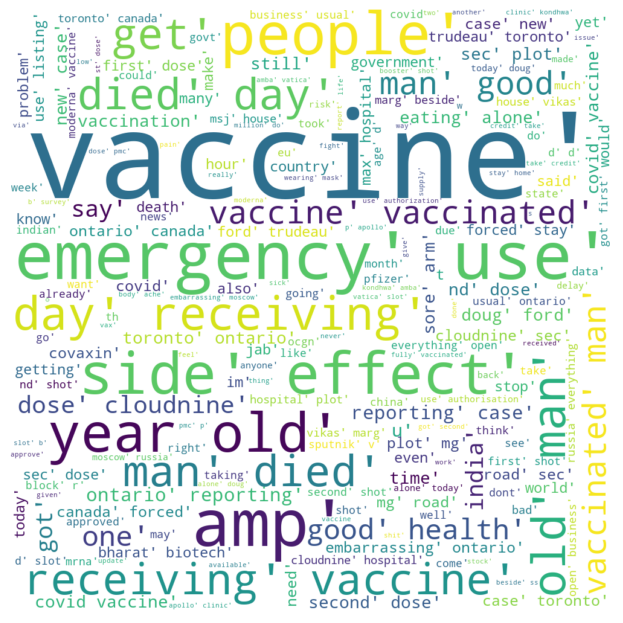

In [ ]:
neg_tweets = data[data.klasifikasi == -1]
neg_string = []
for t in neg_tweets['lemmatization'].astype(str):
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=1000, max_font_size=200 ,background_color='white').generate(neg_string)
plt.figure(figsize=(8,8), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

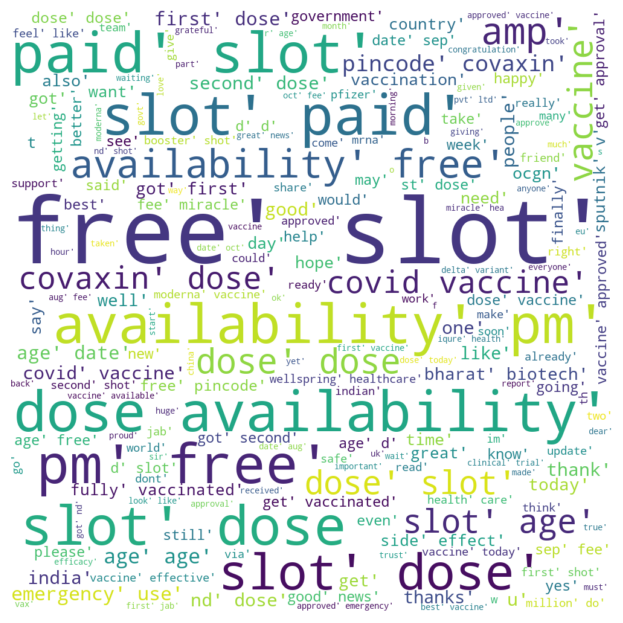

In [ ]:
pos_tweets = data[data.klasifikasi == 1]
pos_string = []
for t in pos_tweets['lemmatization'].astype(str):
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1000, height=1000, max_font_size=200, background_color='white').generate(pos_string)
plt.figure(figsize=(8,8), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

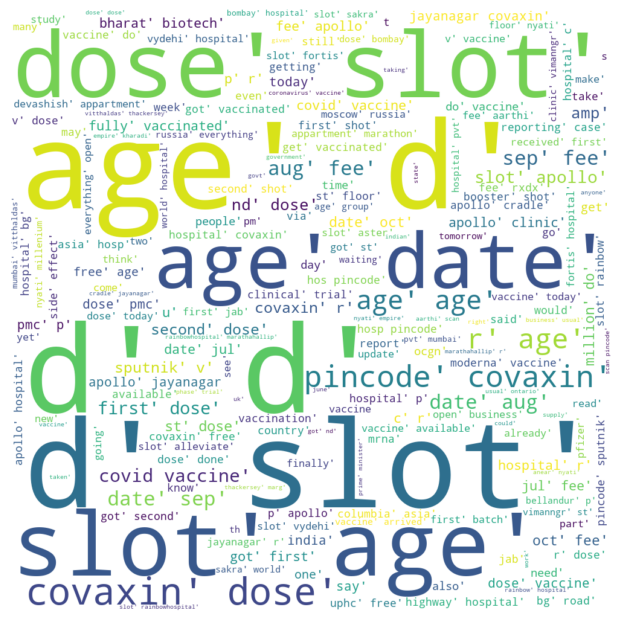

In [ ]:
net_tweets = data[data.klasifikasi == 0]
net_string = []
for t in net_tweets['lemmatization'].astype(str):
    net_string.append(t)
net_string = pd.Series(net_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1000, height=1000,max_font_size=200, background_color='white').generate(net_string)
plt.figure(figsize=(8,8), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()